<a href="https://colab.research.google.com/github/sibaprasada/Loan-Status-Prediction/blob/main/Loan_status_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

Data collection and processing


In [4]:
# the dataset to pandas data set
loan_dataset=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [5]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [6]:
#printing the first five rows of the data frame
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#total number of rows and columns
loan_dataset.shape

(614, 13)

In [8]:
#statistical measure
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
#number of missing value in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [10]:
loan_dataset['Gender'] = loan_dataset['Gender'].fillna(
    loan_dataset['Gender'].mode()[0]
)

loan_dataset['Married'] = loan_dataset['Married'].fillna(
    loan_dataset['Married'].mode()[0]
)

loan_dataset['Dependents'] = loan_dataset['Dependents'].fillna(
    loan_dataset['Dependents'].mode()[0]
)

loan_dataset['Self_Employed'] = loan_dataset['Self_Employed'].fillna(
    loan_dataset['Self_Employed'].mode()[0]
)

loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(
    loan_dataset['Credit_History'].mode()[0]
)

loan_dataset['LoanAmount'] = loan_dataset['LoanAmount'].fillna(
    loan_dataset['LoanAmount'].median()
)

loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(
    loan_dataset['Loan_Amount_Term'].median()
)
loan_dataset.head()
#loan_dataset.isnull().sum()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
loan_dataset.replace({"Gender":{'Male':0,'Female':1}},inplace=True)
loan_dataset.replace({"Education":{'Graduate':0,'Not Graduate':1}},inplace=True)
loan_dataset.replace({"Self_Employed":{'No':0,'Yes':1}},inplace=True)
loan_dataset.replace({"Married":{'No':0,'Yes':1}},inplace=True)

loan_dataset.head()

/tmp/ipython-input-3810399305.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)
/tmp/ipython-input-3810399305.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Gender":{'Male':0,'Female':1}},inplace=True)
/tmp/ipython-input-3810399305.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fu

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [12]:
#dependent column values
loan_dataset['Dependents'].value_counts()
loan_dataset=loan_dataset.replace(to_replace='3+',value=4)
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,360
1,102
2,101
4,51


In [13]:
loan_dataset['Property_Area'].value_counts()

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [14]:
loan_dataset.replace({"Property_Area":{'Rural':0,'Semiurban':1,"Urban":2}},inplace=True)
loan_dataset['Property_Area'].value_counts()

/tmp/ipython-input-873820382.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  loan_dataset.replace({"Property_Area":{'Rural':0,'Semiurban':1,"Urban":2}},inplace=True)


,count
Property_Area,
1,233
2,202
0,179


/tmp/ipython-input-2470231335.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Graduate', 'Not Graduate'])


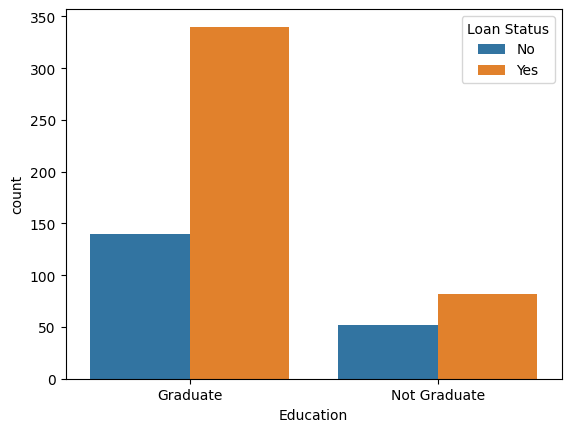

In [15]:
ax=sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)
ax.set_xticklabels(['Graduate', 'Not Graduate'])
ax.legend(title='Loan Status', labels=['No', 'Yes'])

/tmp/ipython-input-3812546014.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Not Married', 'Married'])


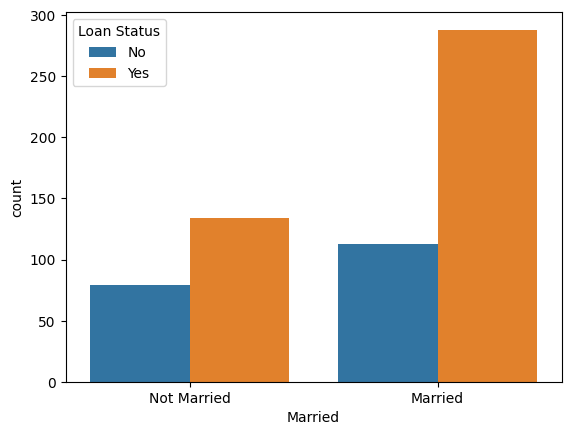

In [16]:
ax=sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)
ax.set_xticklabels(['Not Married', 'Married'])
ax.legend(title='Loan Status', labels=['No', 'Yes'])

In [17]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,0,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [18]:
loan_dataset.drop('Loan_ID', axis=1, inplace=True)

In [20]:
#separating data and label
X=loan_dataset.drop(columns=['Loan_Status'],axis=1)
Y=loan_dataset['Loan_Status']
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         0        0          0          0              0             5849   
1         0        1          1          0              0             4583   
2         0        1          0          0              1             3000   
3         0        1          0          1              0             2583   
4         0        0          0          0              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       1        0          0          0              0             2900   
610       0        1          4          0              0             4106   
611       0        1          1          0              0             8072   
612       0        1          2          0              0             7583   
613       1        0          0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Train Test Split

In [21]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)


In [22]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(552, 11) (62, 11) (552,) (62,)


In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Traing the model -Support vector machine (SVM)model

In [24]:
classifier=svm.SVC(kernel='linear')

In [25]:
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

Model Evaluation

In [26]:
#accuracy score on training data
X_train_prediction=classifier.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [27]:
print("Accuracy on training data",training_data_accuracy)

Accuracy on training data 0.8170289855072463


In [28]:
#accuracy score on testing data
X_test_prediction=classifier.predict(X_test)
testing_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [29]:
print("Accuracy on testing data",testing_data_accuracy)

Accuracy on testing data 0.7903225806451613


In [30]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(Y_test, X_test_prediction))
print(classification_report(Y_test, X_test_prediction))


[[ 9 10]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.75      0.47      0.58        19
           1       0.80      0.93      0.86        43

    accuracy                           0.79        62
   macro avg       0.78      0.70      0.72        62
weighted avg       0.78      0.79      0.77        62



Making a Predictive System

In [31]:
def predict_loan_status():

    gender = input("Enter Gender (Male/Female): ")
    married = input("Married? (Yes/No): ")
    dependents = input("Number of Dependents (0/1/2/3+): ")
    education = input("Education (Graduate/Not Graduate): ")
    self_employed = input("Self Employed? (Yes/No): ")

    applicant_income = float(input("Applicant Income: "))
    coapplicant_income = float(input("Coapplicant Income: "))
    loan_amount = float(input("Loan Amount: "))
    loan_term = float(input("Loan Amount Term (in months): "))
    credit_history = int(input("Credit History (1 = Good, 0 = Bad): "))
    property_area = input("Property Area (Rural/Semiurban/Urban): ")

    # Encoding
    gender = 1 if gender.lower() == 'male' else 0
    married = 1 if married.lower() == 'yes' else 0
    education = 0 if education.lower() == 'graduate' else 1
    self_employed = 1 if self_employed.lower() == 'yes' else 0

    if dependents == '3+':
        dependents = 3
    else:
        dependents = int(dependents)

    property_area_map = {'rural': 0, 'semiurban': 1, 'urban': 2}
    property_area = property_area_map[property_area.lower()]

    import numpy as np

    input_data = np.array([
        gender, married, dependents, education, self_employed,
        applicant_income, coapplicant_income, loan_amount,
        loan_term, credit_history, property_area
    ]).reshape(1, -1)


    # Scaling
    input_data = scaler.transform(input_data)

    # Prediction
    prediction = classifier.predict(input_data)

    if prediction[0] == 1:
        print("\n✅ Loan Approved")
    else:
        print("\n❌ Loan Not Approved")


In [32]:
predict_loan_status()


Enter Gender (Male/Female): male
Married? (Yes/No): yes
Number of Dependents (0/1/2/3+): 2
Education (Graduate/Not Graduate): graduate
Self Employed? (Yes/No): yes
Applicant Income: 30000
Coapplicant Income: 20000
Loan Amount: 30000
Loan Amount Term (in months): 60
Credit History (1 = Good, 0 = Bad): 1
Property Area (Rural/Semiurban/Urban): urban

✅ Loan Approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
